# Project Description:

### AIM:
This project's sole aim is to find out whether there exists any relationship between the World's University Ranking and the expenditure made by each country for their respective education system. This analysis tries to answer the prominent question of: **Does spending more on education lead to better international university rankings?**

### Datasets used:

**University Ranking Data**

Ranking universities is a difficult, political, and controversial practice. There are hundreds of different national and international university ranking systems, many of which disagree with each other.
The **Times Higher Education World University Ranking** is widely regarded as one of the most influential and widely observed university measures. Founded in the United Kingdom in 2010.

**Public and private expenditure on education across the nations**

The dataset used contains information about public and private direct expenditure on education across nations. This data comes from the National Center for Education Statistics. It represents expenditure as a percentage of gross domestic product.


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
ranking= pd.read_csv('timesData.csv')
ranking=ranking[ranking['year']==2011].astype({'world_rank':int}).set_index('country').rename(index={'Republic of Ireland':'Ireland',
                                                                                                    'United States of America':'USA',
                                                                                                    'South Korea':'Korea'})
list1=['USA','Australia','Japan','Korea','United Kingdom'
                   ,'Belgium','Sweden','Norway','Germany','New Zealand','Spain','Netherlands','Austria']
ranking=ranking.loc[list1]
ranking=ranking.groupby(ranking.index)['world_rank'].mean()
ranking=ranking.sort_values()

list1=ranking.index.tolist()
list2=[]
for i in ranking:
    list2.append(i)

['USA',
 'Australia',
 'Japan',
 'Korea',
 'United Kingdom',
 'Belgium',
 'Sweden',
 'Norway',
 'New Zealand',
 'Germany',
 'Spain',
 'Netherlands',
 'Austria']

In [13]:
expen=pd.read_csv('education_expenditure_supplementary_data.csv',index_col=None, header=0, engine='python')
expen=expen.drop(['1995','2000','2005','2010','2009'],axis=1).dropna()
expen=expen[expen['direct_expenditure_type']=='Total'].reset_index().drop(['index'],axis=1).set_index(['country']).rename(index={'United States':'USA',
                                                                                                                                'Korea, Republic of':'Korea'})
expen=expen.iloc[62:].rename(columns={'2011':'%GDP'}).sort_values(by='%GDP',ascending=False)
expen=expen.loc[list1].drop(['institute_type','direct_expenditure_type'],axis=1)
expen
list4=expen['%GDP'].tolist()
list4=[i*100 for i in list4]



[270.0,
 160.0,
 160.0,
 260.0,
 120.0,
 140.0,
 170.0,
 170.0,
 150.0,
 130.0,
 130.0,
 180.0,
 150.0]

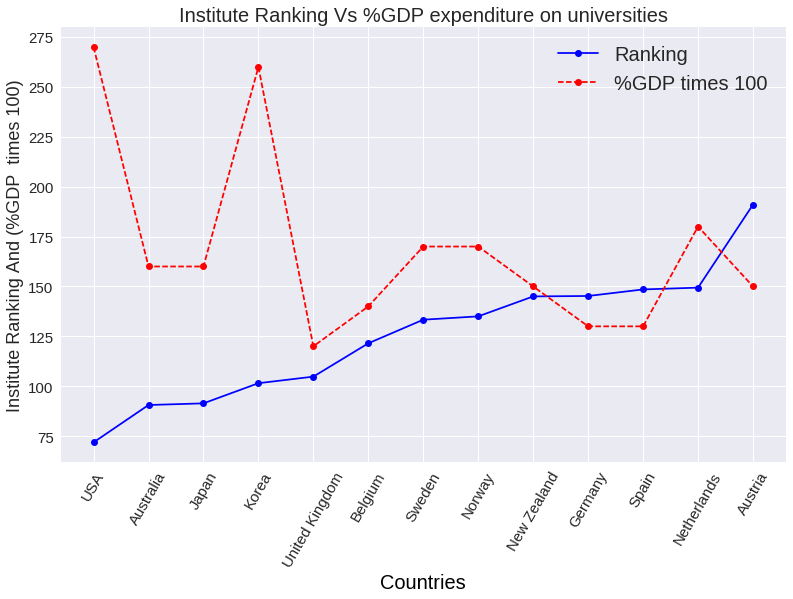

In [71]:
plt.figure(figsize=(13,8))
bins=[]
plt.xticks(np.arange(13), ('USA',
 'Australia',
 'Japan',
 'Korea',
 'United Kingdom',
 'Belgium',
 'Sweden',
 'Norway',
 'New Zealand',
 'Germany',
 'Spain',
 'Netherlands',
 'Austria'),rotation=60,size=15)
plt.plot(list2,'bo-',label='Ranking')
plt.plot(list4,'ro--',label='%GDP times 100')
plt.xlabel('Countries',fontdict={'color':'black'},size=20)
plt.title('Institute Ranking Vs %GDP expenditure on universities',fontstyle='normal',size=20)
plt.ylabel('Institute Ranking And (%GDP  times 100)',size=18)
plt.yticks(size=15)
plt.legend(prop={'size':20})
plt.show()